<h1> Aula 8: Tuplas, Dicionários e Sets

<h2>Tuplas</h2>

Tuplas são **listas imutáveis**. 

In [ ]:
#Podemos fazer uma atribuição incial, acessos...
t = ('a','b','c','d','e')
print(t[0])
print(t[0:2])

a
('a', 'b')


In [ ]:
#E é basicamente isso. 

#Não pode:
t = t + 'f'
t[2] = 'x'
t.append(f)

A **atribuição de tuplas** é uma das coisas mais elegantes do Python fluente. Exemplo:

In [ ]:
import random as rd

#dada duas variáveis aleatórias
a = rd.randint(1,10)
b = rd.randint(1,10)
print(a,b)

#para inverter os seus valores, ao invés de fazer isso:
#temp = b
#b = a
#a = temp

#declaramos uma tupla de variáveis na esquerda, seguida das expressões que atribuirão valores a essas variáveis na direita.
(a,b) = b,a
print(a,b)

#outra maneira ainda mais elegante de escrever é
a,b = b,a

3 5
5 3


In [ ]:
#Outro exemplo

#Isso:
a = 2
b = 3
c = 'feio'

#Poderia ser isso:
a, b, c = 2,3, 'feio'

**Exercício de fixação:** Utilize atribuição de tuplas aliada ao método .split() para separar user_name e domínio de e-mail em uma string: "username@dominio.com"

No tratamento de tuplas, o asterisco (\*) tem uma função especial. No cabeçalho de uma função, ele é **gather**. Ou seja, concatena todos os valores que passarmos na chamada de uma função em uma única tupla.

In [ ]:
def print_all(*todos_os_args):
  print(todos_os_args)

print_all('Estou', 'passando', 'várias', 'entradas', 'Era', 'pra', 'dar', 'erro', 'sem', 'o', 'asterisco')

('Estou', 'passando', 'várias', 'entradas', 'Era', 'pra', 'dar', 'erro', 'sem', 'o', 'asterisco')


Na chamada de uma função, ele é **scatter**. Ou seja, transforma uma tupla em vários elementos.

In [ ]:
def divide_dois_numeros(a,b):
  return a/b

numeros = tuple()
numeros = (4,2)

In [ ]:
#Isso aqui dá erro
divide_dois_numeros(numeros)

TypeError: ignored

In [ ]:
#Mas isso não
divide_dois_numeros(*numeros)

2.0

Antecipando o próximo assunto, podemos criar dicionários a partir de tuplas.

In [ ]:
lista_de_tuplas = [("Marcos",10), ("Pedro", 7), ("João", 10)]
dicionario = dict(lista_de_tuplas)
dicionario

{'João': 10, 'Marcos': 10, 'Pedro': 7}

<h2>Dicionários</h2>

Os **dicionários** parecem-se com listas, mas são mais gerais. 

Na lista, obrigatoriamente, os índices tem que ser do tipo *inteiro*. No dicionário, eles podem ser de (quase) qualquer tipo. 

Os índices de um dicionário são chamados de **chaves**. Cada chave se associa a um único **valor** por meio de um **mapeamento** de índices. Chamamos o resultado dessa associação de **par chave-valor** ou de **item**. 

Vamos a alguns exemplos:


In [ ]:
#criando um dicionário vazio que associará palavras em Português com palavras em Inglês
eng2pt = dict()
eng2pt

{}

In [ ]:
#alimentando o dicionário com pares chave-valor
eng2pt['one'] = 'um'
eng2pt['two'] = 'dois'
eng2pt['three'] = 'três'
eng2pt

{'one': 'um', 'three': 'três', 'two': 'dois'}

Veja que ele organiza por ordem alfabética

In [ ]:
#acessando uma chave para recuperar o valor
eng2pt['two']

'dois'

**Curiosidade interessante:** Na operação de acesso de uma lista, percorremos sequencialmente todos os valores até encontrar o desejado. A operação de acesso de um dicionário usa o princípio de hash tables, que é muito mais rápido e eficiente, mas possui algumas restrições. Para mais de otimização de algoritmos, buscar o termo Big O' no Google.

In [ ]:
#o inverso não funciona
eng2pt['dois']

KeyError: ignored

In [ ]:
#operação in para verificar se há uma chave específica no dicionário
'two' in eng2pt

True

In [ ]:
#o inverso também não funciona
'dois' in 'eng2pt'

False

E se quisséssemos buscar palavras em Português e não em Inglês? 
Precisariamos criar uma lista com os valores.

In [ ]:
pt_words = eng2pt.values()
"dois" in pt_words

True

Ou um novo dicionário invertido. Isso implicaria:

In [ ]:
#1. criar uma lista das chaves
en_words = eng2pt.keys()
print(en_words)

#2. criar uma lista dos valores
pt_words = eng2pt.values()
print(pt_words)

#3. Usar zip para juntar em nova ordem as listas
new_items = zip(pt_words,en_words)
print(new_items)
new_dict = dict(new_items)
print(new_dict)

dict_keys(['one', 'two', 'three'])
dict_values(['um', 'dois', 'três'])
{'um': 'one', 'dois': 'two', 'três': 'three'}


In [ ]:
#outra maneira seria usar dict comprehension para inverter
pt2eng = {v:k for k,v in eng2pt.items()}
pt2eng

{'dois': 'two', 'três': 'three', 'um': 'one'}

O único problema de inverter dicionários, é que podemos perder informações se tivermos valores repetidos nas chaves.  Veja:


In [ ]:
dic_aluno_notas = dict()

dic_aluno_notas['Roberto'] = 10
dic_aluno_notas['Clarissa'] = 8
dic_aluno_notas['Andre'] = 10
dic_aluno_notas['Gustavo'] = 7

dic_aluno_notas

{'Andre': 10, 'Clarissa': 8, 'Gustavo': 7, 'Roberto': 10}

In [ ]:
dic_notas_aluno = {v:k for k,v in dic_aluno_notas.items()}
dic_notas_aluno

{7: 'Gustavo', 8: 'Clarissa', 10: 'Andre'}

Aonde foi parar Roberto?

<h3>Como validar uma chave sem risco de erro?</h3>

Para validar uma chave em um dicionário, podemos simplesmente buscar por ela. Mas caso ela não exista, o programa apresentará erro e parará de funcionar. Veja:

In [2]:
dic_artistas = {'Kurt Cobain': 10000000, 'Axel Rose': 250000000, 'Neil Peart': 500000000}
dic_artistas['Ozzy']

KeyError: ignored

Podemos utilizar tratamento de erros e exceções específicos, mas os dicionários já herdam um método para fazer esta operação que é tão recorrente. Esse é um dos métodos mais usados quando lidamos com dicionários: o **.get()**

In [4]:
consulta = dic_artistas.get('Ozzy')
print(consulta)

None


In [5]:
#Alternativamente, podemos informar o valor padrão
consulta2 = dic_artistas.get('Ozzy', 'Não foi possível encontrar a chave')
print(consulta2)

Não foi possível encontrar a chave


Por boas práticas, caso queiramos atribuir um valor padrão ao invés de exibir uma mensagem de erro caso a chave não seja encontrada, podemos utilizar o método **.setdefault()**:

In [6]:
#caso o valor já esteja cadastrado, ele mantém o original
dic_artistas.setdefault('Kurt Cobain', 15000)
dic_artistas

{'Axel Rose': 250000000, 'Kurt Cobain': 10000000, 'Neil Peart': 500000000}

In [7]:
#caso não esteja cadastrado, ele adiciona a chave e o valor no dicionário
dic_artistas.setdefault('Ozzy Osbourne', 150000000)
dic_artistas

{'Axel Rose': 250000000,
 'Kurt Cobain': 10000000,
 'Neil Peart': 500000000,
 'Ozzy Osbourne': 150000000}

<h3>O dicionário como uma coleção de contadores</h3>

Vamos fazer um exercício simples de contar as letras de uma palavra usando dicionários. 

Se fossemos fazer isso usando listas, teríamos que criar 26 variáveis (número de letras do alfaberto) e ficar incrementando contadores dentro de estruturas condicionais (if-elif-else). Veja como isso se torna mais simples.

In [ ]:
def conta_letras(frase):
  dic_letras = dict()
  for caracter in frase:
    #Se a chave ainda não tiver no dicionário, adiciona
    if caracter not in dic_letras:
      dic_letras[caracter] = 1
    #Se já estiver, só incrementa o valor
    else:
      dic_letras[caracter] += 1
    
  return dic_letras

In [ ]:
d_let = conta_letras('Hello! How are you doing?')
d_let

{' ': 4,
 '!': 1,
 '?': 1,
 'H': 2,
 'a': 1,
 'd': 1,
 'e': 2,
 'g': 1,
 'i': 1,
 'l': 2,
 'n': 1,
 'o': 4,
 'r': 1,
 'u': 1,
 'w': 1,
 'y': 1}

Na Estatística, essas tabelas de frequência são geralmente transformada em gráficos conhecidos como **Histogramas**. 

Que tal plotarmos nosso primeiro histograma?

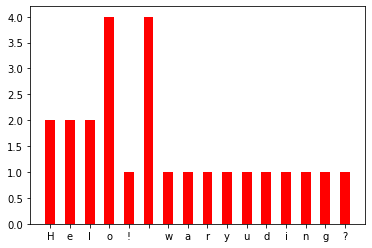

In [ ]:
import matplotlib.pyplot as plt

plt.bar(d_let.keys(),d_let.values(), width = 0.5, color = 'red')
plt.show()

<h2>Sets (ou Conjuntos)</h2>

Sem muito segredo, os sets nos oferecem a quantidade de valores únicos dentro de uma lista ou uma tupla.

In [ ]:
set1 = {'a','b', 'a', 'c'}
print(type(set1), set1)

<class 'set'> {'a', 'b', 'c'}


In [ ]:
#O mesmo vale para quaisquer outros tipos de variáveis
set2 = set((True, False, False, True, False))
print(set2)

set3 = set(['Gustavo', 'Alexandre', 'Marcos', 'Gustavo', 'Marcos'])
print(set3)

{False, True}
{'Alexandre', 'Gustavo', 'Marcos'}


<h3> Exercício

Analisar texto de documentos ou notícias que possa ser útil para o André, usando as estruturas de dados aqui presentes.